# Assignment 08: Network Analysis

## Step 1: Make a new Jupyter notebook.

In [38]:
import requests
from bs4 import BeautifulSoup
import dash
import dash_cytoscape as cyto
from dash import html, dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
from jupyter_dash.comms import _send_jupyter_config_comm_request
import networkx as nx
import matplotlib.pyplot as plt


## Step 2: Take the Shakespeare play you've previously been analyzing and construct a network visualization

In [20]:
response = requests.get('https://www.gutenberg.org/files/1524/1524-h/1524-h.htm')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")
document = document.text


In [22]:
_send_jupyter_config_comm_request()
JupyterDash.infer_jupyter_proxy_config()

In [23]:
document = document[document.find('ACT I'):document.find('*** END OF THE PROJECT GUTENBERG EBOOK HAMLET ***')]
acts = document.split('ACT')[1:]
len(acts)


5

In [26]:
characters = ['HAMLET','CLAUDIUS','THE GHOST','GERTRUDE','LAERTES',
              'OPHELIA','HORATIO','FORTINBRAS','VOLTEMAND','CORNELIUS',
              'ROSENCRANTZ','GUILDENSTERN','MARCELLUS','BARNARDO',
              'FRANCISCO','OSRIC','REYNALDO']

In [27]:
charnum = {}

connections = {}

for i in range(len(characters)-1):
    for j in range(i+1,len(characters)):
        connections[(characters[i],characters[j])] = 0

for k in characters:
    charnum[k] = 0

for i in acts:
    for j in i.split('SCENE')[1:]:
        scenechars = []
        for k in characters:
            if j.find(k) != -1:
                scenechars.append(k)
                charnum[k] += 1
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                connections[(scenechars[a],scenechars[b])] += 1

In [28]:
connections

{('HAMLET', 'CLAUDIUS'): 0,
 ('HAMLET', 'THE GHOST'): 0,
 ('HAMLET', 'GERTRUDE'): 0,
 ('HAMLET', 'LAERTES'): 4,
 ('HAMLET', 'OPHELIA'): 2,
 ('HAMLET', 'HORATIO'): 7,
 ('HAMLET', 'FORTINBRAS'): 2,
 ('HAMLET', 'VOLTEMAND'): 2,
 ('HAMLET', 'CORNELIUS'): 1,
 ('HAMLET', 'ROSENCRANTZ'): 7,
 ('HAMLET', 'GUILDENSTERN'): 5,
 ('HAMLET', 'MARCELLUS'): 3,
 ('HAMLET', 'BARNARDO'): 1,
 ('HAMLET', 'FRANCISCO'): 0,
 ('HAMLET', 'OSRIC'): 1,
 ('HAMLET', 'REYNALDO'): 0,
 ('CLAUDIUS', 'THE GHOST'): 0,
 ('CLAUDIUS', 'GERTRUDE'): 0,
 ('CLAUDIUS', 'LAERTES'): 0,
 ('CLAUDIUS', 'OPHELIA'): 0,
 ('CLAUDIUS', 'HORATIO'): 0,
 ('CLAUDIUS', 'FORTINBRAS'): 0,
 ('CLAUDIUS', 'VOLTEMAND'): 0,
 ('CLAUDIUS', 'CORNELIUS'): 0,
 ('CLAUDIUS', 'ROSENCRANTZ'): 0,
 ('CLAUDIUS', 'GUILDENSTERN'): 0,
 ('CLAUDIUS', 'MARCELLUS'): 0,
 ('CLAUDIUS', 'BARNARDO'): 0,
 ('CLAUDIUS', 'FRANCISCO'): 0,
 ('CLAUDIUS', 'OSRIC'): 0,
 ('CLAUDIUS', 'REYNALDO'): 0,
 ('THE GHOST', 'GERTRUDE'): 0,
 ('THE GHOST', 'LAERTES'): 0,
 ('THE GHOST', 'OPHELIA')

In [29]:
for k,v in charnum.items():
    print(k,v)

HAMLET 15
CLAUDIUS 0
THE GHOST 0
GERTRUDE 0
LAERTES 6
OPHELIA 5
HORATIO 8
FORTINBRAS 2
VOLTEMAND 2
CORNELIUS 1
ROSENCRANTZ 7
GUILDENSTERN 5
MARCELLUS 4
BARNARDO 2
FRANCISCO 1
OSRIC 1
REYNALDO 1


In [34]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)
    
graphitems

[{'data': {'id': 'HAMLET', 'label': 'Hamlet', 'size': '15'}},
 {'data': {'id': 'CLAUDIUS', 'label': 'Claudius', 'size': '0'}},
 {'data': {'id': 'THE GHOST', 'label': 'The Ghost', 'size': '0'}},
 {'data': {'id': 'GERTRUDE', 'label': 'Gertrude', 'size': '0'}},
 {'data': {'id': 'LAERTES', 'label': 'Laertes', 'size': '6'}},
 {'data': {'id': 'OPHELIA', 'label': 'Ophelia', 'size': '5'}},
 {'data': {'id': 'HORATIO', 'label': 'Horatio', 'size': '8'}},
 {'data': {'id': 'FORTINBRAS', 'label': 'Fortinbras', 'size': '2'}},
 {'data': {'id': 'VOLTEMAND', 'label': 'Voltemand', 'size': '2'}},
 {'data': {'id': 'CORNELIUS', 'label': 'Cornelius', 'size': '1'}},
 {'data': {'id': 'ROSENCRANTZ', 'label': 'Rosencrantz', 'size': '7'}},
 {'data': {'id': 'GUILDENSTERN', 'label': 'Guildenstern', 'size': '5'}},
 {'data': {'id': 'MARCELLUS', 'label': 'Marcellus', 'size': '4'}},
 {'data': {'id': 'BARNARDO', 'label': 'Barnardo', 'size': '2'}},
 {'data': {'id': 'FRANCISCO', 'label': 'Francisco', 'size': '1'}},
 {'dat

In [35]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v}}
        graphitems.append(dashedge)
    
graphitems

[{'data': {'id': 'HAMLET', 'label': 'Hamlet', 'size': '15'}},
 {'data': {'id': 'CLAUDIUS', 'label': 'Claudius', 'size': '0'}},
 {'data': {'id': 'THE GHOST', 'label': 'The Ghost', 'size': '0'}},
 {'data': {'id': 'GERTRUDE', 'label': 'Gertrude', 'size': '0'}},
 {'data': {'id': 'LAERTES', 'label': 'Laertes', 'size': '6'}},
 {'data': {'id': 'OPHELIA', 'label': 'Ophelia', 'size': '5'}},
 {'data': {'id': 'HORATIO', 'label': 'Horatio', 'size': '8'}},
 {'data': {'id': 'FORTINBRAS', 'label': 'Fortinbras', 'size': '2'}},
 {'data': {'id': 'VOLTEMAND', 'label': 'Voltemand', 'size': '2'}},
 {'data': {'id': 'CORNELIUS', 'label': 'Cornelius', 'size': '1'}},
 {'data': {'id': 'ROSENCRANTZ', 'label': 'Rosencrantz', 'size': '7'}},
 {'data': {'id': 'GUILDENSTERN', 'label': 'Guildenstern', 'size': '5'}},
 {'data': {'id': 'MARCELLUS', 'label': 'Marcellus', 'size': '4'}},
 {'data': {'id': 'BARNARDO', 'label': 'Barnardo', 'size': '2'}},
 {'data': {'id': 'FRANCISCO', 'label': 'Francisco', 'size': '1'}},
 {'dat

In [36]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

correctionfactor = max(connections.values())
print(correctionfactor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)

7


In [37]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size':4,
                    'color': 'black',
                    'background-color': 'blue',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/alana.malika129@gmail.com/proxy/8050/


Also include a description (via markdown cells) of the network's density and the "most important" nodes.
You can choose what "most important" means, but use a quantitative metric and include this metric's value(s) in your description.

In [39]:
nxgraphitems = []

# for k,v in charnum.items():
#     dashnode = k
#     graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = (k[0],k[1])
        nxgraphitems.append(dashedge)
    
nxgraphitems

[('HAMLET', 'LAERTES'),
 ('HAMLET', 'OPHELIA'),
 ('HAMLET', 'HORATIO'),
 ('HAMLET', 'FORTINBRAS'),
 ('HAMLET', 'VOLTEMAND'),
 ('HAMLET', 'CORNELIUS'),
 ('HAMLET', 'ROSENCRANTZ'),
 ('HAMLET', 'GUILDENSTERN'),
 ('HAMLET', 'MARCELLUS'),
 ('HAMLET', 'BARNARDO'),
 ('HAMLET', 'OSRIC'),
 ('LAERTES', 'OPHELIA'),
 ('LAERTES', 'HORATIO'),
 ('LAERTES', 'FORTINBRAS'),
 ('LAERTES', 'VOLTEMAND'),
 ('LAERTES', 'CORNELIUS'),
 ('LAERTES', 'MARCELLUS'),
 ('LAERTES', 'BARNARDO'),
 ('LAERTES', 'OSRIC'),
 ('OPHELIA', 'HORATIO'),
 ('OPHELIA', 'ROSENCRANTZ'),
 ('OPHELIA', 'GUILDENSTERN'),
 ('OPHELIA', 'REYNALDO'),
 ('HORATIO', 'FORTINBRAS'),
 ('HORATIO', 'VOLTEMAND'),
 ('HORATIO', 'CORNELIUS'),
 ('HORATIO', 'ROSENCRANTZ'),
 ('HORATIO', 'GUILDENSTERN'),
 ('HORATIO', 'MARCELLUS'),
 ('HORATIO', 'BARNARDO'),
 ('HORATIO', 'FRANCISCO'),
 ('HORATIO', 'OSRIC'),
 ('FORTINBRAS', 'ROSENCRANTZ'),
 ('FORTINBRAS', 'OSRIC'),
 ('VOLTEMAND', 'CORNELIUS'),
 ('VOLTEMAND', 'ROSENCRANTZ'),
 ('VOLTEMAND', 'GUILDENSTERN'),
 ('VOLT

In [40]:
G = nx.Graph()

In [41]:
G.nodes

NodeView(())

In [43]:
nx.degree_centrality(G)

{}

In [46]:
G.add_edges_from(nxgraphitems)

dc = nx.degree_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))


Horatio        : 0.923
Hamlet         : 0.846
Laertes        : 0.692
Voltemand      : 0.615
Marcellus      : 0.538
Barnardo       : 0.538
Ophelia        : 0.462
Cornelius      : 0.462
Rosencrantz    : 0.462
Fortinbras     : 0.385
Guildenstern   : 0.385
Osric          : 0.308
Francisco      : 0.231
Reynaldo       : 0.077


Horatio is the "most important" node which has a 0.923 degree centrality.

In [47]:
from networkx.algorithms.community import greedy_modularity_communities

[['FRANCISCO', 'VOLTEMAND', 'BARNARDO', 'MARCELLUS', 'HORATIO', 'CORNELIUS'], ['HAMLET', 'OSRIC', 'LAERTES', 'FORTINBRAS'], ['OPHELIA', 'REYNALDO', 'ROSENCRANTZ', 'GUILDENSTERN']]


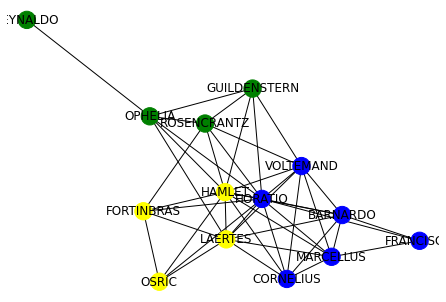

In [52]:
greedy_modularity_communities(G)
communities = greedy_modularity_communities(G)
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number
        
communities = greedy_modularity_communities(G)

node_groups = []
for com in communities:
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('yellow')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()        

In [53]:
graphitems = []

# size_correction_factor = max(charnum.values())

for k,v in charnum.items():
    if k in node_groups[0]:
        modularity = 'blue'
    elif k in node_groups[1]:
        modularity = 'green'
    else:
        modularity = 'red'
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v),'modularity': modularity}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)
    
graphitems

7


[{'data': {'id': 'HAMLET',
   'label': 'Hamlet',
   'size': '15',
   'modularity': 'green'}},
 {'data': {'id': 'CLAUDIUS',
   'label': 'Claudius',
   'size': '0',
   'modularity': 'red'}},
 {'data': {'id': 'THE GHOST',
   'label': 'The Ghost',
   'size': '0',
   'modularity': 'red'}},
 {'data': {'id': 'GERTRUDE',
   'label': 'Gertrude',
   'size': '0',
   'modularity': 'red'}},
 {'data': {'id': 'LAERTES',
   'label': 'Laertes',
   'size': '6',
   'modularity': 'green'}},
 {'data': {'id': 'OPHELIA',
   'label': 'Ophelia',
   'size': '5',
   'modularity': 'red'}},
 {'data': {'id': 'HORATIO',
   'label': 'Horatio',
   'size': '8',
   'modularity': 'blue'}},
 {'data': {'id': 'FORTINBRAS',
   'label': 'Fortinbras',
   'size': '2',
   'modularity': 'green'}},
 {'data': {'id': 'VOLTEMAND',
   'label': 'Voltemand',
   'size': '2',
   'modularity': 'blue'}},
 {'data': {'id': 'CORNELIUS',
   'label': 'Cornelius',
   'size': '1',
   'modularity': 'blue'}},
 {'data': {'id': 'ROSENCRANTZ',
   'labe

In [54]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size': 4,
                    'color': 'black',
                    'background-color': 'data(modularity)',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'square'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'black',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/alana.malika129@gmail.com/proxy/8050/


Information contained in the graphs:
- Node size: degree or number of connections

- Edge weights: degree or number of connections normalized by the max connection number

- Colors (rgb): colors assigned based on the greedy modularity communities algorithm